<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200504_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
img_file = '/content/drive/My Drive/파이썬활용/dark.png'
image = cv2.imread(img_file)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

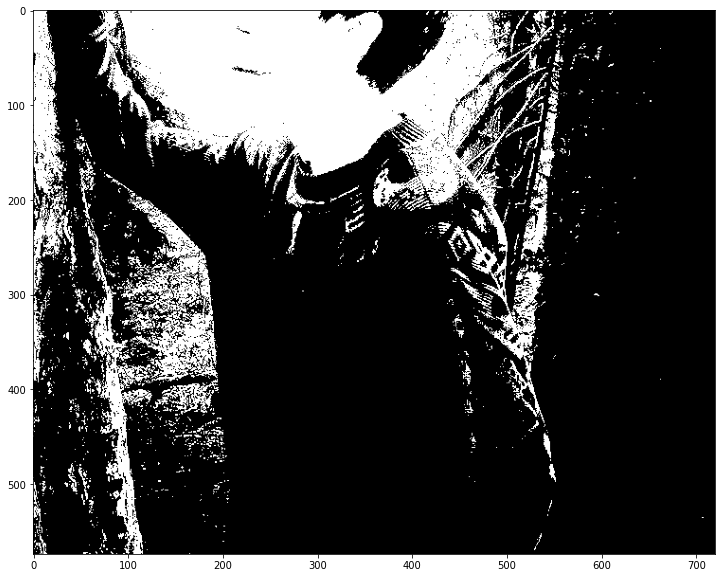

In [ ]:
# 흑백 이미지(BGR로 불러온것은 GRAY로 바꿔준다.)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image_gray, 15, 255,  cv2.THRESH_BINARY)
#값을 입력함에 따라서 흑과 백으로 이진화할 수 있다. 
#이미지 출력
plt.imshow(thresh, 'gray')
plt.show()

#히스토그램

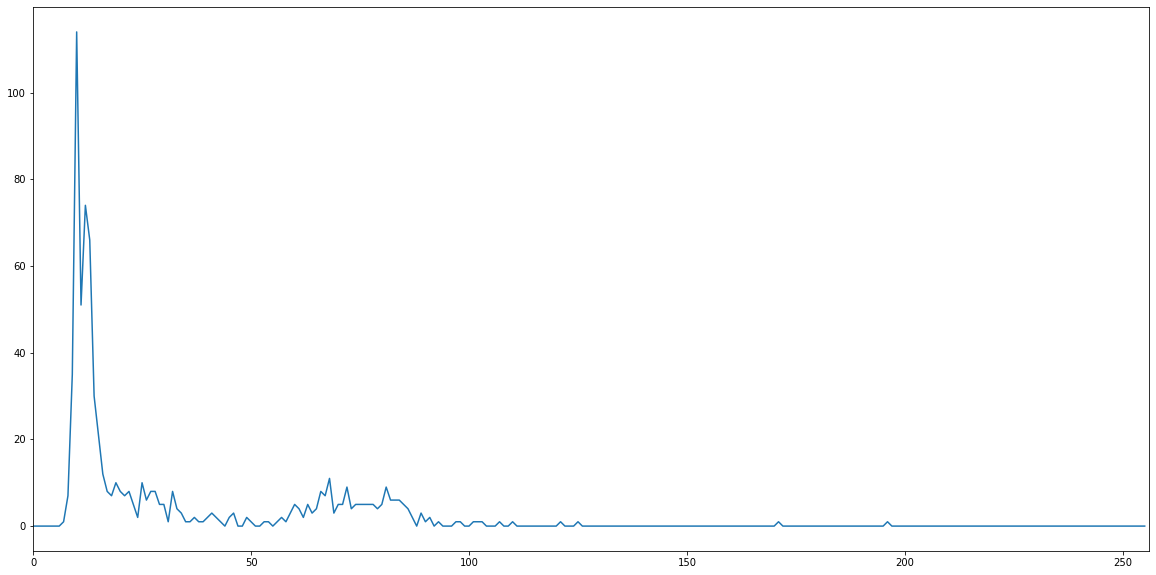

In [ ]:
img_hist = cv2.calcHist(image_gray,[0],None,[256],[0,256]) 
#어떤이미지, 흑백0 bgr123으로 채널을 줌,None : 마스크작업(특정부분 뽑아내는거)
#[256] : 3개의 값, 범위   
plt.plot(img_hist)
plt.xlim([0,256])
plt.show()
#오른쪽에 크면 밝게 찍힘, 왼쪽이 크면 어둡게 찍힘

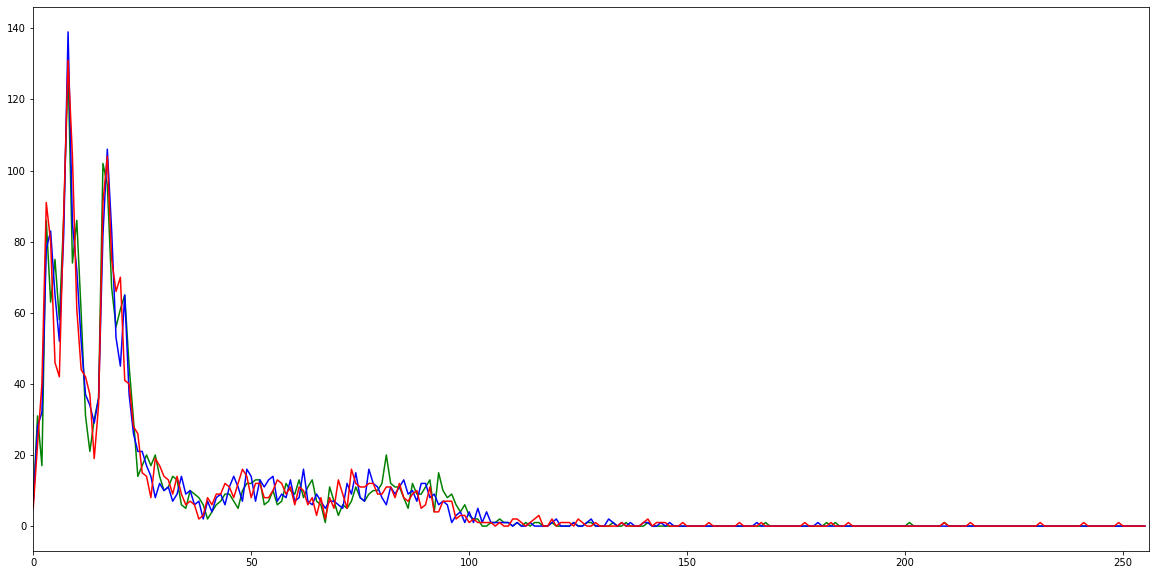

In [ ]:
#컬러 
image_bgr = image

color = {'b','g','r'}
for i, col in enumerate(color):
  img_hist = cv2.calcHist(image,[i],None,[256],[0,256])
  plt.plot(img_hist,color = col)
  plt.xlim([0,256])
plt.show()  

#Edge 추출

<function matplotlib.pyplot.show>

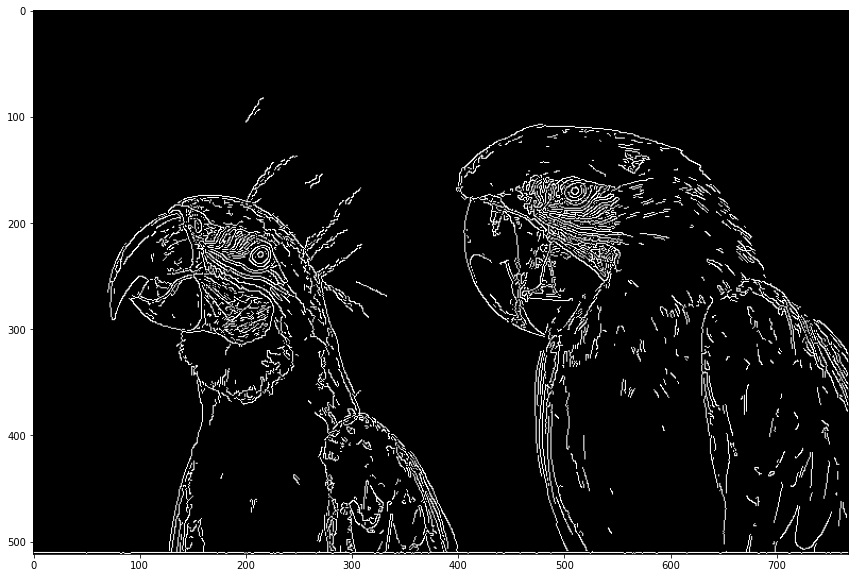

In [ ]:
#흑백
image_gray = cv2.imread('/content/drive/My Drive/파이썬활용/sample-color.png',cv2.IMREAD_GRAYSCALE)

#캐니 경계썬 감지기
#중간 픽셀 강동에서 위아래 표준편차1 떨어진 값을 연계값으로 지정합니다.
image_canny = cv2.Canny(image_gray,70,100)

plt.imshow(image_canny,cmap='gray')
plt.show

###image blending
이미지 합성(이미지 더하기)

가중치를 더해서 합쳐준다.

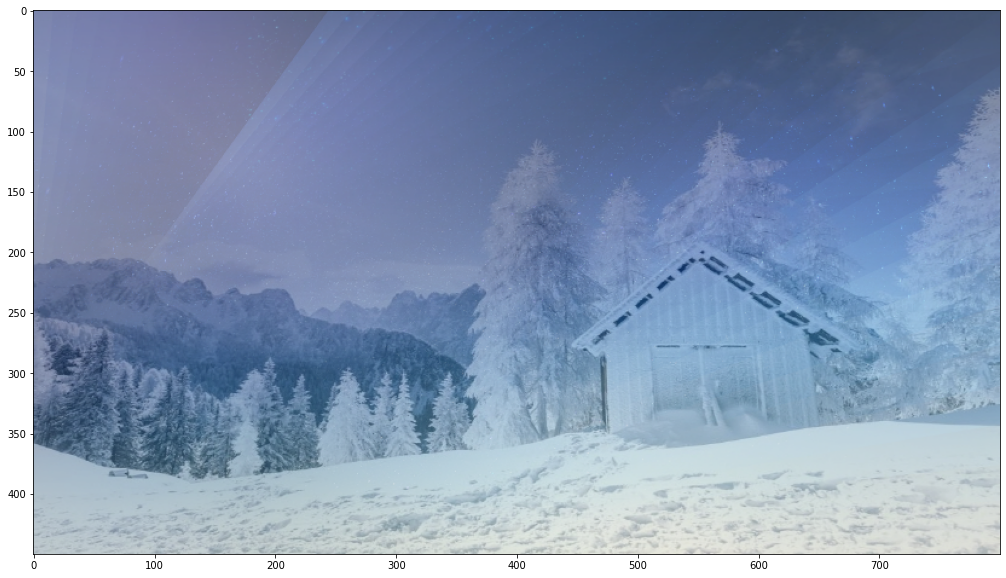

In [ ]:
img1 = cv2.imread('/content/drive/My Drive/파이썬활용/img1.jpg')
img2 = cv2.imread('/content/drive/My Drive/파이썬활용/img2.jpg')

#result
blending = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)


#이미지를 출력
plt.imshow(cv2.cvtColor(blending, cv2.COLOR_BGR2RGB))
plt.show()

#image Insert

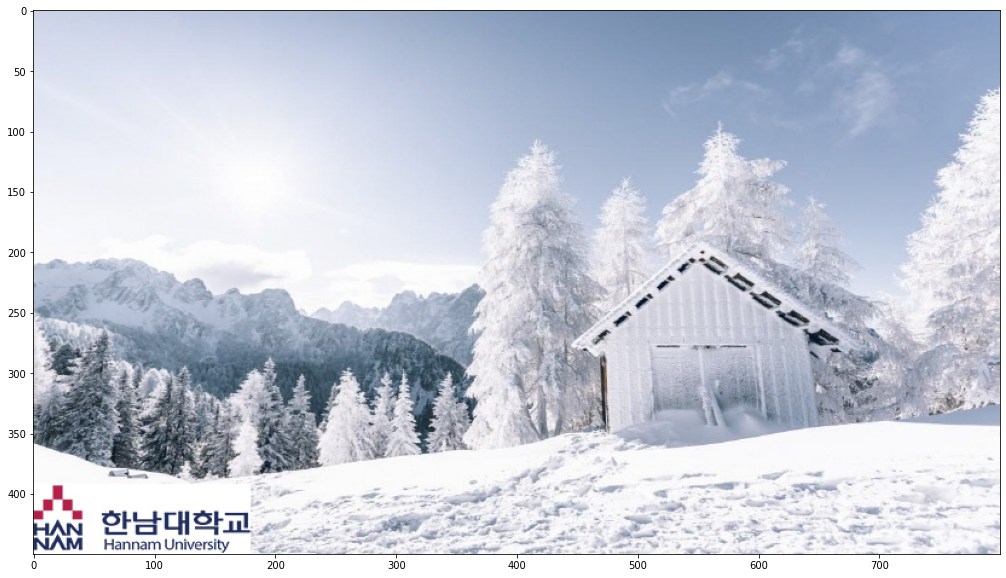

In [ ]:
#Load two images

img1 = cv2.imread('/content/drive/My Drive/파이썬활용/img1.jpg')
img2 = cv2.imread('/content/drive/My Drive/파이썬활용/logo.jpg')

#삽입할 이미지의 row, col, channel 정보
rows1, cols1, channels1 = img1.shape #차원을 나타냄, 컬러기때문에 행, 열 , 페이지의 수 3개를 나타냄
rows2, cols2, channels2 = img2.shape #같은방식으로 

#합쳐진 이미지를 원본 이미지에 추가
#img1[0:rows2, 0:cols2] = img2 #좌측상단
img1[rows1-rows2:, 0:cols2] = img2
#이미지1에 있는곳에 덮어 씌움
#좌측상단 좌측하단 우측 상단 하단 연습해보기!


#이미지 출력
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_RGB2BGR))
plt.show()